# Modules, dataset and initial assessment

**Objectives:** 

- Loading all the necessary Python modules that will be used during the project
- Loading the dataset on which the algorithm will be used
- Briefly exploring the dataset (variable content and description, missing values...)

In-code comments will be preceded by the hashtag symbol (#)

## Modules (or libraries)

In [7]:
#--- Data management ---

import pandas as pd 
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None) 
import datetime 
import numpy as np

#--- visualization ---

import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_theme()
sns.set_style("whitegrid")

#--- models/algorithms ---

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Dataset

In [8]:
link_df = "https://raw.githubusercontent.com/darista92/TFM/main/HRDataset_v14.csv"

df = pd.read_csv(link_df) 

df.head() # first 5 rows of the dataset

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


The initial dataset consists of 311 rows and 36 columns

In [9]:
df.shape 

(311, 36)

## Variable description

A new dataset is created, containing the description of each variable, the desired type of the variables (as retrieved from the source) and the variable type assigned by default once loading the dataset into a dataframe object. From now on, dataset and dataframe terms will be used analogously to refer to a table-shaped group of data.

This "description dataframe" will be used for better recalling the meaning of each feature



Source = https://rpubs.com/rhuebner/hr_codebook_v14

In [10]:
link_scrapped_df = "https://raw.githubusercontent.com/darista92/TFM/main/Description_scrapped.csv"
scrapped_df = pd.read_csv(link_scrapped_df, delimiter=";") # conjunto de datos con las variables explicadas

In [11]:
# preparación de variables para la creación de la tabla de referencia

columns = df.columns # columnas del conjunto original
description = scrapped_df.Description # descripción de cada variable
var_type = scrapped_df.DataType # tipo de cada variable (deseado)
real_var_type = list(df.dtypes) # tipos de cada variable al importar el dataset en Python

# eliminación momentánea de la columna "GenderID", ya que no posee descripción en la fuente original

columns = columns.drop("GenderID")


In [6]:
# creación de la tabla de referencia

df_cheatsheet = pd.DataFrame({"columns":columns, "description":description, "var_type":var_type})

GenderID = {"columns": "GenderID", "descripcion":"1=Masculine", "Tipo_Variable":"Binary"}

df_cheatsheet = df_cheatsheet.append(GenderID, ignore_index=True)

df_cheatsheet["Tipo_VReal"] = Tipo_VReal

df_cheatsheet

,columnas,descripcion,Tipo_Variable,Tipo_VReal
0,Employee_Name,Employees full name,Text,object
1,EmpID,Employee ID is unique to each employee,Text,int64
2,MarriedID,Is the person married (1 or 0 for yes or no),Binary,int64
3,MaritalStatusID,Marital status code that matches the text field MaritalDesc,Integer,int64
4,EmpStatusID,Employment status code that matches text field EmploymentStatus,Integer,int64
5,DeptID,Department ID code that matches the department the employee works in,Integer,int64
6,PerfScoreID,Performance Score code that matches the employees most recent performance score,Integer,int64
7,FromDiversityJobFairID,Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no,Binary,int64
8,Salary,The persons hourly pay rate. All salaries are converted to hourly pay rate,Float,int64
9,Termd,Has this employee been terminated - 1 or 0,Binary,int64


## Valores perdidos

In [7]:
missing_val = df.isnull().sum() 

print(missing_val)


Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [8]:
cols_miss_val = missing_val[missing_val > 0]

print(cols_miss_val)

DateofTermination    207
ManagerID              8
dtype: int64


# EDA

**Objetivos:**

- Entender mejor el conjunto de datos
- Visualizar algunas de las variables más importantes y su distribución
- Establecer comparaciones entre variables

In [9]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [10]:
df.describe() # estadísticos descriptivos del conjunto de datos

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


## Tabla comparativa en función de la variable dependiente

In [11]:
N_Termd_descriptive = df.query("Termd==0").mean().round(2)
Y_Termd_descriptive = df.query("Termd!=0").mean().round(2)

Desc_comparison = pd.DataFrame({"Retained":N_Termd_descriptive,"Lost":Y_Termd_descriptive })

Desc_comparison.drop(Desc_comparison.index[[1,3,4,6,8,9,10,11,12,14,17,18]], inplace=True)

Desc_comparison["Difference"] = Desc_comparison["Retained"] - Desc_comparison["Lost"]


Desc_comparison

,Retained,Lost,Difference
Absences,9.83,11.05,-1.22
DaysLateLast30,0.29,0.66,-0.37
EmpSatisfaction,3.89,3.88,0.01
EngagementSurvey,4.12,4.09,0.03
PerfScoreID,3.01,2.90,0.11
Salary,70694.03,65690.08,5003.95
SpecialProjectsCount,1.46,0.73,0.73


## Empleados por sexo

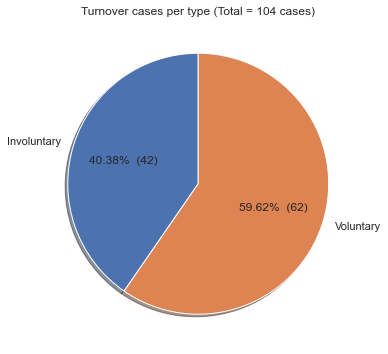

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
values = [42,62] 
labels= ["Involuntary", "Voluntary"]

plt.pie(values, labels=labels, shadow=True, startangle=90, autopct=make_autopct(values))
plt.title("Turnover cases per type (Total = 104 cases)")
plt.show()

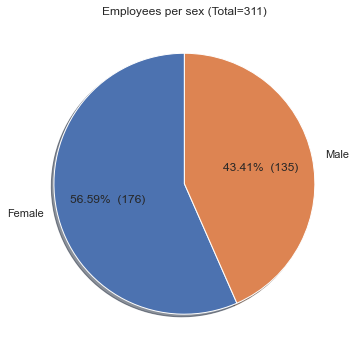

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
values = [df["Sex"].value_counts()[0],df["Sex"].value_counts()[1]]
labels= ["Female", "Male"]
plt.pie(values, labels=labels, shadow=True, startangle=90, autopct=make_autopct(values))
plt.title("Employees per sex (Total=311)")
plt.show()

Comparamos la relación entre el sexo del empleado y la rotación de personal

In [14]:
Sex_t = pd.crosstab(df["Sex"], df["Termd"])

Sex_t["Total"] = Sex_t[0] + Sex_t[1]

Sex_t["% employees lost"] = (Sex_t[1] / Sex_t["Total"] * 100).round(2)

Sex_t.rename(columns={0:"No",1:"Yes"}, inplace=True)

Sex_t


Termd,No,Yes,Total,% employees lost
Sex,,,,
F,116,60,176,34.09
M,91,44,135,32.59


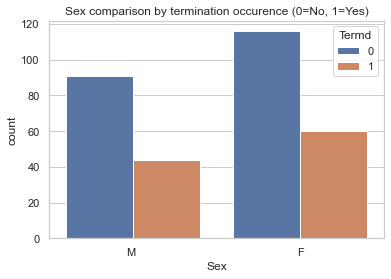

In [15]:
sns.countplot(data=df, x="Sex", hue="Termd")
plt.title("Sex comparison by termination occurence (0=No, 1=Yes)")
plt.show()


## Empleados por estado civil

In [16]:
MD_t = pd.crosstab(df["MaritalDesc"], df["Termd"])

MD_t["Total"] = MD_t[0] + MD_t[1]

MD_t["% employees lost"] = (MD_t[1] / MD_t["Total"] * 100).round(2)

MD_t.rename(columns={0:"No",1:"Yes"}, inplace=True)

MD_t.sort_values("Total", ascending=False, inplace=True)

MD_t

Termd,No,Yes,Total,% employees lost
MaritalDesc,,,,
Single,101,36,137,26.28
Married,77,47,124,37.90
Divorced,14,16,30,53.33
Separated,11,1,12,8.33
Widowed,4,4,8,50.00


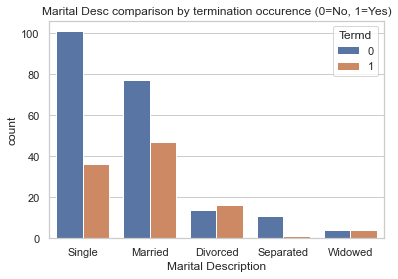

In [17]:
sns.countplot(data=df, x=df["MaritalDesc"],hue="Termd", order=df["MaritalDesc"].value_counts().index)
plt.title("Marital Desc comparison by termination occurence (0=No, 1=Yes)")
plt.xlabel("Marital Description")
plt.show()

## Empleados por departamento

En el caso de los departamentos, es posible visualizar el gráfico para comprobar que en ningún caso existe una cantidad de abandonos (voluntarios o involuntarios) igual o mayor que la cantidad de retenciones

C:\Users\arist\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



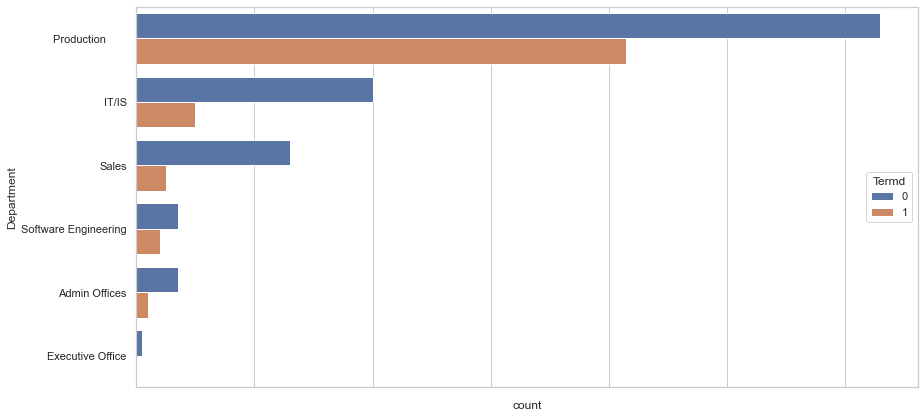

In [18]:
plt.figure(figsize=(14,7))
g_dept = sns.countplot(data=df, y="Department",order= df.Department.value_counts().index, hue="Termd")
g_dept.set_xticklabels(g_dept.get_xticklabels(),rotation=90)
plt.show()

## Empleados por salario

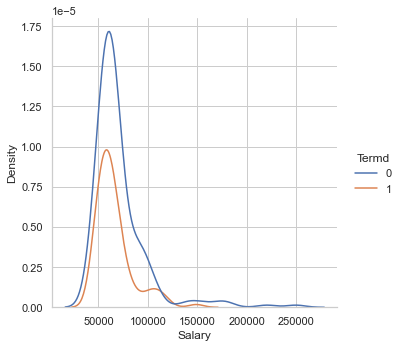

In [19]:
sns.displot(data=df, x="Salary", hue="Termd", kind="kde")
plt.show()

## Empleados por motivo de salida

In [410]:
Lost_employees = df[df["TermReason"]!="N/A-StillEmployed"]

#assertion 

print(Lost_employees.Termd.mean())

1.0


In [411]:
Lost_employees_per_reason =Lost_employees["TermReason"].value_counts()

Lost_employees_per_reason.iplot(kind="bar")

## Salidas o terminaciones voluntarias vs. involuntarias

In [412]:
Lost_employees_per_reason

Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
military                             4
performance                          4
retiring                             4
no-call, no-show                     4
maternity leave - did not return     3
medical issues                       3
Fatal attraction                     1
gross misconduct                     1
Learned that he is a gangster        1
Name: TermReason, dtype: int64

In [413]:
inv_reasons = ["Another position", "attendance", "performance", "retiring", 
                        "no-call, no-show", "medical issues"]

reasons = []

for reason in Lost_employees_per_reason.index:
    if reason in inv_reasons:
        reasons.append("involuntary")
    else:
        reasons.append("voluntary")
    
print(reasons)

['involuntary', 'voluntary', 'voluntary', 'voluntary', 'voluntary', 'involuntary', 'voluntary', 'voluntary', 'voluntary', 'involuntary', 'involuntary', 'involuntary', 'voluntary', 'involuntary', 'voluntary', 'voluntary', 'voluntary']


In [414]:
Reason_desc = Lost_employees_per_reason.index

reasons_classified = pd.DataFrame({"reason":Reason_desc, "type":reasons, "n_cases":Lost_employees_per_reason})

reasons_classified

,reason,type,n_cases
Another position,Another position,involuntary,20
unhappy,unhappy,voluntary,14
more money,more money,voluntary,11
career change,career change,voluntary,9
hours,hours,voluntary,8
attendance,attendance,involuntary,7
return to school,return to school,voluntary,5
relocation out of area,relocation out of area,voluntary,5
military,military,voluntary,4
performance,performance,involuntary,4


In [25]:
reasons_by_type = reasons_classified.groupby("type")["n_cases"].sum()
reasons_by_type

type
involuntary    42
voluntary      62
Name: n_cases, dtype: int64

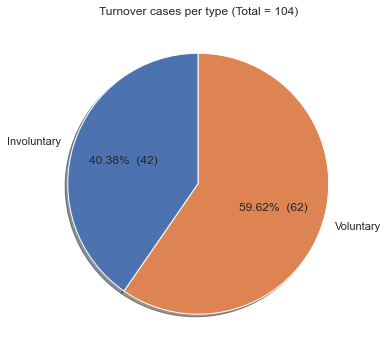

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
values = [reasons_by_type[0],reasons_by_type[1]] 
labels= ["Involuntary", "Voluntary"]

plt.pie(values, labels=labels, shadow=True, startangle=90, autopct=make_autopct(values))
plt.title("Turnover cases per type (Total = 104)")
plt.show()

# Feature engineering : preprocesamiento de los datos

**Objetivos**:

- Descartar las variables no relevantes para alimentar al algoritmo
- Transformar los tipos de variables en tipos admitidos por el algoritmo
- Crear nuevas variables (en caso necesario)

## Nuevas features cuantitativas

### Copia del df inicial

In [27]:
df_cuanti = df.copy()

### Variables de fecha a formato datetime

In [152]:
# Primero, creamos una fecha final para DofTermination, para poder calcular los años en la empresa

df_cuanti["DateofTermination"] = df_cuanti["DateofTermination"].fillna("31/12/2020")

# pasamos dofTermination, dofHire y DOB a datetime

df_cuanti[["DateofTermination", "DateofHire","DOB","LastPerformanceReview_Date"]] = df_cuanti[["DateofTermination", "DateofHire","DOB","LastPerformanceReview_Date"]].apply(pd.to_datetime)

### Variable Age

In [29]:
# Creamos la fecha que sobre la que restaremos la fecha de nacimiento

december_31 = "2020-12-31"

# la pasamos a datetime

december_31_date = datetime.datetime.strptime(december_31, '%Y-%m-%d')


# loop con cada resta (en valor absoluto) entre 31-12-2020 y fecha de nacimiento, y append a la lista age

age = []

from dateutil.relativedelta import relativedelta

for i in df_cuanti["DOB"]:
    xx = abs(relativedelta (december_31_date, i))
    age.append(xx.years)
    


df_cuanti["Age"] = age

print(df_cuanti["Age"])

0      37
1      45
2      32
3      32
4      31
       ..
306    35
307    38
308    41
309    41
310    42
Name: Age, Length: 311, dtype: int64


### Variable Months in Company

In [30]:

df_cuanti["Months_in_company"] = (df_cuanti["DateofTermination"] - df_cuanti["DateofHire"]).astype('timedelta64[Y]')*12


print(df_cuanti["Months_in_company"].head())




0    108.0
1     12.0
2     12.0
3    144.0
4     60.0
Name: Months_in_company, dtype: float64


### Variable months_since_P_review

In [31]:
years_Preview = []

for i in df_cuanti["LastPerformanceReview_Date"]:
    xxxx = abs(relativedelta (december_31_date, i))
    years_Preview.append(xxxx.years)
    


df_cuanti["Months_since_P_review"] = [i * 12 for i in years_Preview]

print(df_cuanti["Months_since_P_review"])

0      12
1      48
2      96
3      12
4      48
       ..
306    12
307    60
308    12
309    12
310    12
Name: Months_since_P_review, Length: 311, dtype: int64


### Dataframe cuantitativo final

In [387]:
df_cuanti.to_excel("df_cuanti.xlsx")

## Matriz de correlaciones

In [388]:
df_corr = df_cuanti[["PerfScoreID","Salary", "Age", "Months_in_company", "Months_since_P_review","EngagementSurvey",
                         "EmpSatisfaction","SpecialProjectsCount","DaysLateLast30","Absences" ]]

df_corr.head()

,PerfScoreID,Salary,Age,Months_in_company,Months_since_P_review,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,4,62506,37,108.0,12,4.60,5,0,0,1
1,3,104437,45,12.0,48,4.96,3,6,0,17
2,3,64955,32,12.0,96,3.02,3,0,0,3
3,3,64991,32,144.0,12,4.84,5,0,0,15
4,3,50825,31,60.0,48,5.00,4,0,0,2


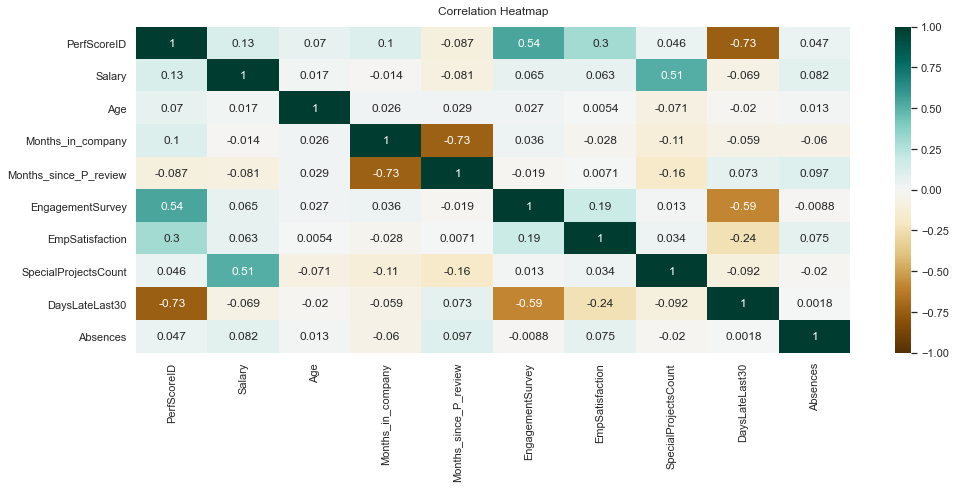

In [389]:

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

Observaciones:
- La última **evaluación del desempeño** correlaciona positivamente con la medición de engagement (externa) y satisfacción (interna). Correlaciona negativamente con los retrasos en los últimos 30 días
- El **número de proyectos especiales** correlaciona positivamente con el salario
- El **número de años en la compañía** correlaciona negativamente con el número de años sin evaluación del desempeño (los "veteranos" han tenido evaluaciones del desempeño más recientemente). Puede que haya colinearidad --> eliminar years since P review
- La **medición de engagement (externa)** correlaciona negativamente con los retrasos en los últimos 30 días




## Creación de variables categoriales binarias (dummy) y df finales

### Variables dummy

In [476]:
df_train_test = df_cuanti[["MaritalStatusID","GenderID", "DeptID", "PerfScoreID", "Salary",
                           "PositionID", "CitizenDesc", "RaceDesc", "ManagerID", "EngagementSurvey",
                           "EmpSatisfaction", "SpecialProjectsCount", "DaysLateLast30", 
                           "Absences", "Age", "Months_in_company", "Months_since_P_review"]]

In [477]:
dummies = pd.get_dummies(df_train_test[["CitizenDesc", "RaceDesc"]])

### Dataframe final 

In [ ]:
df_final = df_train_test.merge(dummies, left_index=True, right_index=True).drop(["CitizenDesc", "RaceDesc", "Months_since_P_review"], axis=1)

#monthssincepreview / months in company --> ELIMINAR 1 DEBIDO A MULTICOLINEARIDAD

In [478]:
# ManagerID tiene valores vacíos

df_final["ManagerID"].fillna(0, inplace=True)

In [480]:
df_final.head()

,MaritalStatusID,GenderID,DeptID,PerfScoreID,Salary,PositionID,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Months_in_company,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White
0,0,1,5,4,62506,19,22.0,4.60,5,0,0,1,37,108.0,0,0,1,0,0,0,0,0,1
1,1,1,3,3,104437,27,4.0,4.96,3,6,0,17,45,12.0,0,0,1,0,0,0,0,0,1
2,1,0,5,3,64955,20,20.0,3.02,3,0,0,3,32,12.0,0,0,1,0,0,0,0,0,1
3,1,0,5,3,64991,19,16.0,4.84,5,0,0,15,32,144.0,0,0,1,0,0,0,0,0,1
4,2,0,5,3,50825,19,39.0,5.00,4,0,0,2,31,60.0,0,0,1,0,0,0,0,0,1


## Cálculo de índices de rotación de personal

### Variable mes-año

In [286]:
link = "https://raw.githubusercontent.com/darista92/TFM/main/dates_parsed.csv"

df_dates = pd.read_csv(link, delimiter=";")

df_dates.head()

month_in = pd.to_datetime(df_dates["DateofHire"], format="%Y-%m")

month_out = pd.to_datetime(df_dates["DateofTermination"], format="%Y-%m")

In [287]:
basis_loop = np.datetime64("2006-01")
top = np.datetime64("2021-01")

monthly_data = []

while basis_loop < top:
    monthly_data.append(basis_loop)
    basis_loop += np.timedelta64(1,"M")

### Variables contratación y terminación (absoluta y acumulada)

In [288]:
cumul_in = []
counter = 0

for i in monthly_data:
    for j in list(month_in):
        if i > j :
            counter += 1         
    cumul_in.append(counter)
    counter=0

print(cumul_in)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 13, 16, 17, 17, 18, 20, 21, 22, 22, 22, 37, 43, 44, 52, 64, 66, 79, 84, 94, 95, 105, 105, 113, 118, 121, 131, 135, 135, 139, 143, 147, 148, 150, 150, 155, 157, 157, 160, 163, 163, 172, 178, 187, 187, 194, 194, 200, 207, 210, 210, 220, 220, 229, 232, 245, 245, 253, 254, 265, 273, 285, 285, 287, 289, 290, 290, 290, 290, 290, 290, 292, 292, 292, 292, 293, 296, 301, 301, 302, 304, 304, 304, 305, 308, 308, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311]


In [289]:
def monthly_difference(agg_list):
    empty_list = [0]  
    for i in range(1,len(agg_list)):
        x = agg_list[i] - agg_list[i-1]
        empty_list.append(x)
    return empty_list

In [275]:
hirings = monthly_difference(cumul_in)

In [323]:
cumul_out = []
counter = 0

for i in monthly_data:
    for j in list(month_out):
        if i > j:
            counter += 1
    cumul_out.append(counter)
    counter=0

print(cumul_out)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 4, 4, 5, 6, 6, 7, 8, 8, 8, 9, 11, 11, 12, 12, 14, 15, 15, 18, 18, 23, 23, 24, 25, 25, 25, 25, 28, 28, 29, 32, 33, 33, 34, 36, 37, 38, 38, 38, 38, 38, 39, 41, 41, 45, 45, 46, 53, 55, 59, 61, 63, 68, 68, 69, 74, 76, 76, 76, 81, 81, 83, 83, 84, 85, 85, 86, 86, 87, 88, 89, 90, 90, 90, 91, 91, 92, 92, 95, 96, 97, 98, 101, 103, 103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104]


In [324]:
terminations = monthly_difference(cumul_out)

### Dataframe con datos sobre contrataciones y terminaciones por mes

In [327]:
monthly_df = pd.DataFrame({"month":monthly_data, "hirings": hirings, "terminations": terminations})

monthly_df["cumul_hirings"] = cumul_in
monthly_df["cumul_terminations"] = cumul_out
monthly_df["headcount"] = monthly_df["cumul_hirings"] - monthly_df["cumul_terminations"]


monthly_df.tail()

,month,hirings,terminations,cumul_hirings,cumul_terminations,headcount
175,2020-08-01,0,0,311,104,207
176,2020-09-01,0,0,311,104,207
177,2020-10-01,0,0,311,104,207
178,2020-11-01,0,0,311,104,207
179,2020-12-01,0,0,311,104,207


### Visualización en línea temporal

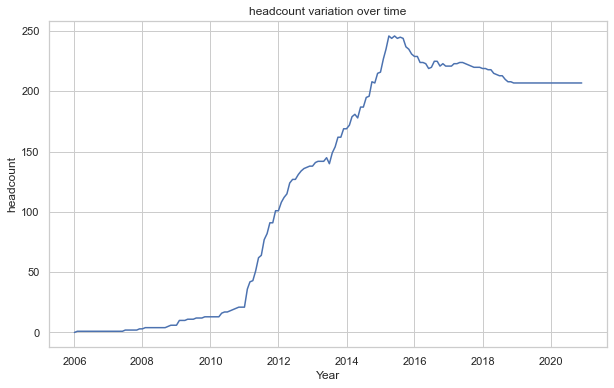

In [328]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=monthly_df, x="month", y="headcount")
plt.xlabel("Year")
plt.title("headcount variation over time")
plt.show()

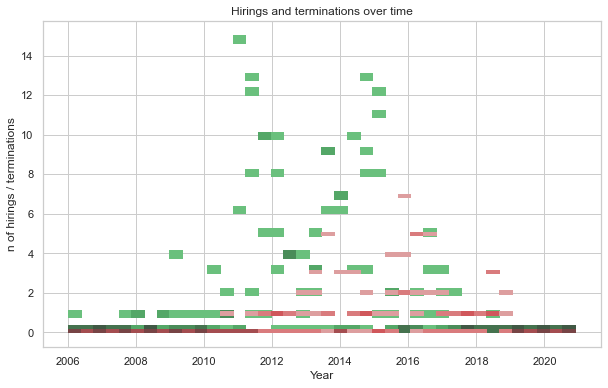

In [348]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=monthly_df, x="month", y="hirings", color="g", bins=40)
sns.histplot(data=monthly_df, x="month", y="terminations", color="r", bins=40)
plt.xlabel("Year")
plt.ylabel("n of hirings / terminations")
plt.title("Hirings and terminations over time")
plt.show()

### índice de rotación de personal

In [453]:
terminations_2020 = monthly_df.query("month >= '2020-01-01'")["terminations"].sum()
mean_headcount_2020 = monthly_df.query("month >= '2020-01-01'")["headcount"].mean()

print("Turnover index in 2020 is " + str(round(terminations_2020/mean_headcount_2020*100)) +"%")



Turnover index in 2020 is 0%


In [455]:
terminations_last10 = monthly_df.query("month >= '2011-01-01'")["terminations"].sum()

mean_headcount_last10 = round(monthly_df.query("month >= '2011-01-01'")["headcount"].mean(),2)

print("Turnover index in the last 10 years is " + str(round(terminations_last5/mean_headcount_last5*100)) +"%")

print("Average turnover index during the last 10 years is " + str(round(terminations_last5/mean_headcount_last5*100/10, 2))
+ "%")


Turnover index in the last 10 years is 21%
Average turnover index during the last 10 years is 2.1%


### índice de rotación de personal voluntario

In [456]:
non_voluntary = inv_reasons
non_voluntary.append("N/A-StillEmployed")

non_voluntary

['Another position',
 'attendance',
 'performance',
 'retiring',
 'no-call, no-show',
 'medical issues',
 'N/A-StillEmployed',
 'N/A-StillEmployed']

In [457]:
df_cuanti["Voluntary_termination"] = ~df_cuanti["TermReason"].isin(non_voluntary)


df_cuanti.Voluntary_termination

0      False
1       True
2       True
3      False
4       True
       ...  
306    False
307    False
308    False
309    False
310    False
Name: Voluntary_termination, Length: 311, dtype: bool

Dado que el número de salidas es 0 en 2020, el índice de rotación de personal voluntaria también será 0. Se calculará, pues, el índice de rotación de personal voluntaria para los últimos 10 años

In [475]:
voluntary_leavers_last10 = len(df_cuanti.query("DateofHire >= '2011-01-01' & Voluntary_termination == True"))

print("Voluntary turnover index in the last 10 years is " + str(round(voluntary_leavers_last10/terminations_last10*100,2))+"%")

print("Average voluntary turnover index during the last 10 years is " + str(round(voluntary_leavers_last10/terminations_last10*100/10, 2))
+ "%")


Voluntary turnover index in the last 10 years is 55.34%
Average voluntary turnover index during the last 10 years is 5.53%


# Creación y fit del modelo

## Ensamblamiento del dataframe para train/test

In [543]:
X = np.asarray(df_final)

X = StandardScaler().fit(X).transform(X)

y = np.asarray(df_cuanti["Termd"])

print(X.shape, y.shape)

(311, 23) (311,)


In [544]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

for i in X_train, X_test, y_train, y_test:
    print (i.shape)    

(248, 23)
(63, 23)
(248,)
(63,)


## Aplicación del modelo algorítmico

In [545]:
model = RandomForestClassifier(n_estimators=500, max_features=12, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(max_features=12, n_estimators=500, random_state=42)

# Predicciones y evaluación del modelo

In [546]:
y_pred = model.predict(X_test)

In [547]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.83      0.68      0.75        22

    accuracy                           0.84        63
   macro avg       0.84      0.80      0.82        63
weighted avg       0.84      0.84      0.84        63



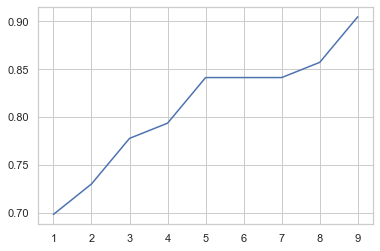

In [548]:
acc_p_t = [] #accuracy per tree

for i in range(1,10):
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_p_t.append(metrics.accuracy_score(y_test, y_pred))
    
    
x_rangerino = range(1,10)
plt.plot(x_rangerino, acc_p_t)
plt.show()

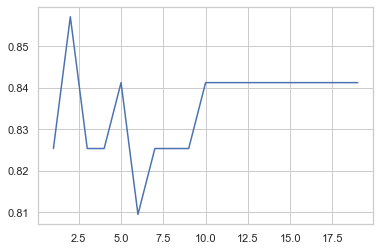

In [549]:
acc_p_e = [] #accuracy per estimator

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=500, max_features=i,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_p_e.append(metrics.accuracy_score(y_test, y_pred))
    
x_rangerino2 = range(1,20)
plt.plot(x_rangerino2, acc_p_e)
plt.show()

# Visualización

[[38  3]
 [ 7 15]]


<AxesSubplot:>

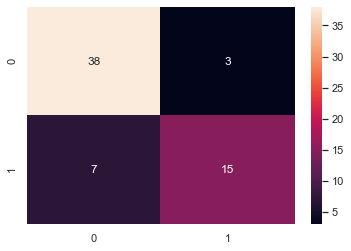

In [610]:
cm = metrics.confusion_matrix(y_test, y_pred)

print(cm)

sns.heatmap(cm, annot=True)

In [611]:
features = pd.DataFrame(model.feature_importances_, index = df_final.columns,
                       columns = ["importance"]).sort_values("importance", ascending=False)

features

,importance
Months_in_company,0.512238
ManagerID,0.094828
Salary,0.082505
SpecialProjectsCount,0.052468
Absences,0.048212
Age,0.040697
EngagementSurvey,0.039885
EmpSatisfaction,0.020378
MaritalStatusID,0.018125
PositionID,0.017559


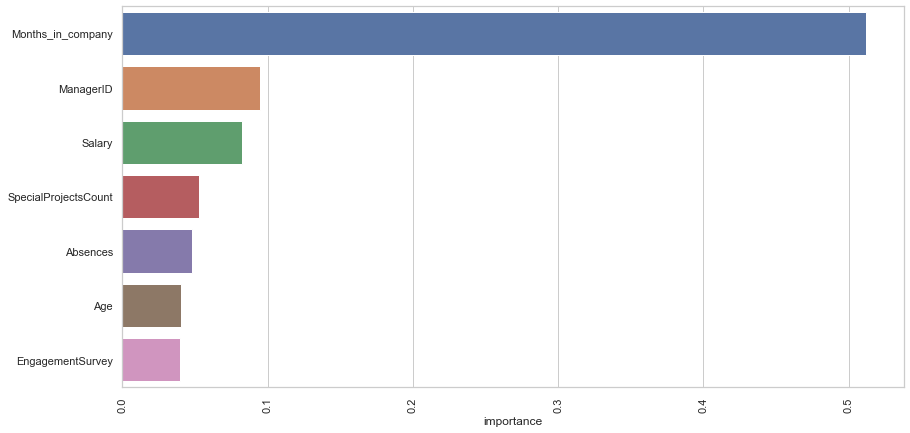

In [612]:
plt.figure(figsize=(14,7))
query = features.query("importance > 0.03")
sns.barplot(data=query, y=query.index, x="importance", orient="h")
plt.xticks(rotation=90)
plt.show()


In [613]:
# FALTA SHAPLEY

# Aplicación del modelo a la predicción de rotación de personal voluntaria

In [614]:
X_v = np.asarray(df_final)

X_v = StandardScaler().fit(X).transform(X)

y_v = np.array(df_cuanti.Voluntary_termination.astype("int"))

print(X_v.shape, y_v.shape)

(311, 23) (311,)


In [555]:
X_vtrain, X_vtest, y_vtrain, y_vtest = train_test_split(X_v,y_v,test_size=0.2, random_state=42)

for i in X_vtrain, X_vtest, y_vtrain, y_vtest:
    print (i.shape)  

(248, 23)
(63, 23)
(248,)
(63,)


In [556]:
model_v = RandomForestClassifier(n_estimators=500, max_features=17, random_state=42)

model_v.fit(X_vtrain, y_vtrain)

RandomForestClassifier(max_features=17, n_estimators=500, random_state=42)

In [557]:
y_vpred = model_v.predict(X_vtest)

In [558]:
print(metrics.classification_report(y_vtest, y_vpred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        48
           1       0.86      0.40      0.55        15

    accuracy                           0.84        63
   macro avg       0.85      0.69      0.72        63
weighted avg       0.84      0.84      0.82        63



In [559]:
'''acc_p_t_v = [] #accuracy per tree

for i in range(1,10):
    model_v = RandomForestClassifier(n_estimators=i, random_state=42)
    model_v.fit(X_train, y_train)
    y_vpred = model_v.predict(X_test)
    acc_p_t_v.append(metrics.accuracy_score(y_vtest, y_vpred))
    
    
x_vrangerino = range(1,10)
plt.plot(x_vrangerino, acc_p_t_v)
plt.show()'''

'acc_p_t_v = [] #accuracy per tree\n\nfor i in range(1,10):\n    model_v = RandomForestClassifier(n_estimators=i, random_state=42)\n    model_v.fit(X_train, y_train)\n    y_vpred = model_v.predict(X_test)\n    acc_p_t_v.append(metrics.accuracy_score(y_vtest, y_vpred))\n    \n    \nx_vrangerino = range(1,10)\nplt.plot(x_vrangerino, acc_p_t_v)\nplt.show()'

In [560]:
'''acc_p_e_v = [] #accuracy per estimator

for i in range(1,20):
    model_v = RandomForestClassifier(n_estimators=500, max_features=i,random_state=42)
    model_V.fit(X_train, y_train)
    y_vpred = model_v.predict(X_vtest)
    acc_p_e_v.append(metrics.accuracy_score(y_vtest, y_vpred))
    
x_vrangerino2 = range(1,20)
plt.plot(x_vrangerino2, acc_p_e_v)
plt.show()'''

'acc_p_e_v = [] #accuracy per estimator\n\nfor i in range(1,20):\n    model_v = RandomForestClassifier(n_estimators=500, max_features=i,random_state=42)\n    model_V.fit(X_train, y_train)\n    y_vpred = model_v.predict(X_vtest)\n    acc_p_e_v.append(metrics.accuracy_score(y_vtest, y_vpred))\n    \nx_vrangerino2 = range(1,20)\nplt.plot(x_vrangerino2, acc_p_e_v)\nplt.show()'

[[38  3]
 [ 7 15]]


<AxesSubplot:>

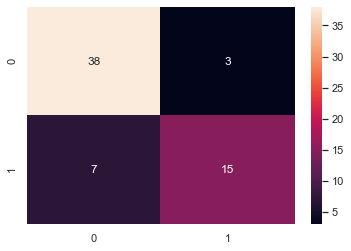

In [615]:
cm_v = metrics.confusion_matrix(y_vtest, y_vpred)

print(cm)

sns.heatmap(cm, annot=True)

In [616]:
features_v = pd.DataFrame(model_v.feature_importances_, index = df_final.columns,
                       columns = ["importance"]).sort_values("importance", ascending=False)

features_v

,importance
Months_in_company,0.273462
Salary,0.156900
ManagerID,0.134224
Absences,0.084102
Age,0.072124
MaritalStatusID,0.056355
EngagementSurvey,0.047444
PositionID,0.044177
SpecialProjectsCount,0.022821
EmpSatisfaction,0.022427


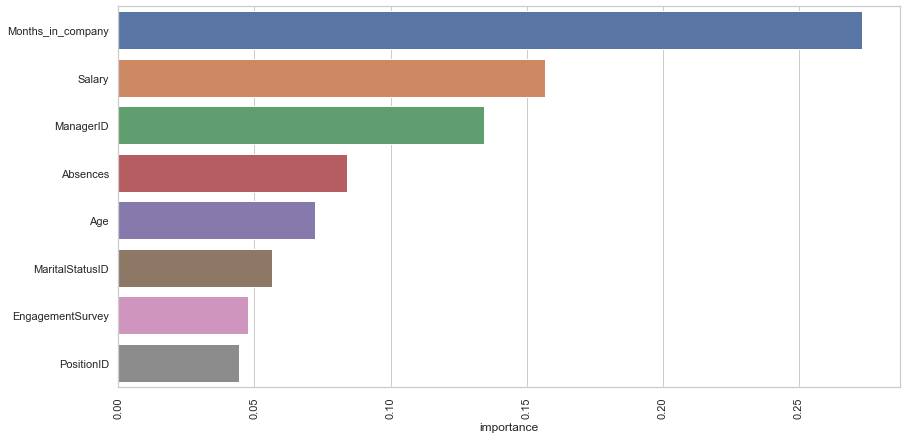

In [617]:
plt.figure(figsize=(14,7))
query2 = features_v.query("importance > 0.03")
sns.barplot(data=query2, y=query2.index, x="importance", orient="h")
plt.xticks(rotation=90)
plt.show()

In [625]:
features.sort_index(inplace=True)
features_v.sort_index(inplace=True)

comp = features.merge(features_v, left_index=True, right_index=True)

comp.rename(columns={"importance_x":"Turnover", "importance_y":"Voluntary_turnover"},inplace=True)

comp


,Turnover,Voluntary_turnover
Absences,0.048212,0.084102
Age,0.040697,0.072124
CitizenDesc_Eligible NonCitizen,0.001246,0.009585
CitizenDesc_Non-Citizen,0.004395,0.003563
CitizenDesc_US Citizen,0.002170,0.006204
DaysLateLast30,0.017055,0.004939
DeptID,0.014603,0.011357
EmpSatisfaction,0.020378,0.022427
EngagementSurvey,0.039885,0.047444
GenderID,0.006551,0.013545


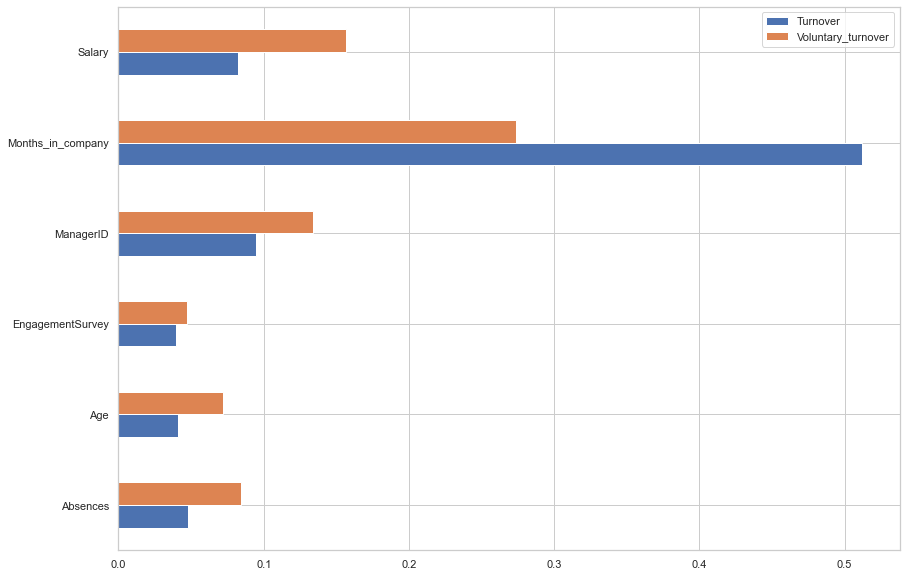

In [656]:
comp2 = comp.query("Turnover > 0.03 & Voluntary_turnover > 0.03")
comp2.plot(kind="barh", figsize=(14,10))
plt.show()